<a href="https://colab.research.google.com/github/Nils1511/ImageProcessing/blob/main/IP_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
import matplotlib.pyplot as plt
import PIL
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


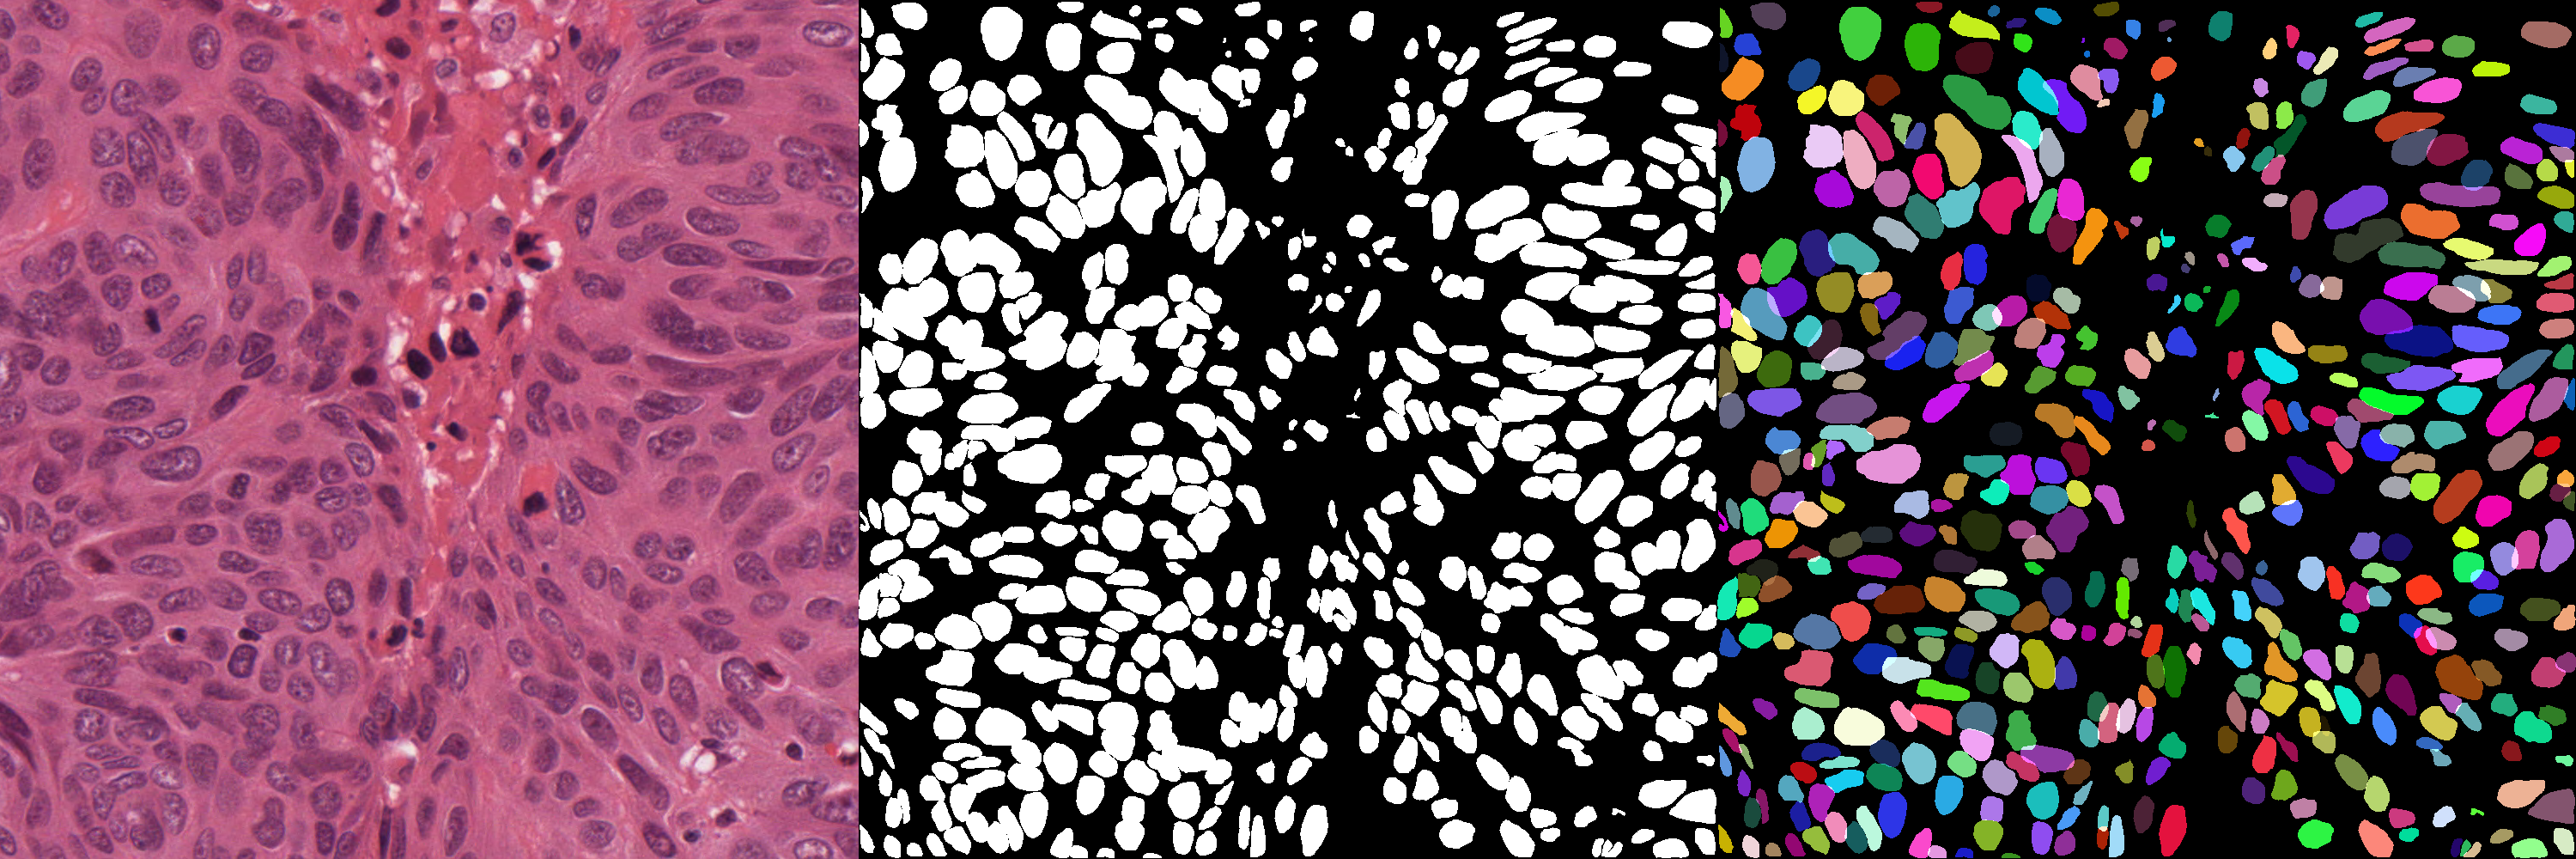

In [ ]:
def load_images_from_folder(folder):                          # from stackoverflow
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        # img = cv2.resize(img,(700,700))
        if img is not None:
            images.append(img)
    return images

train_tissue_image = load_images_from_folder("/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Training-Data/Tissue-Images")
train_binary_mask = load_images_from_folder("/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Training-Data/Binary-Mask")
train_color_mask = load_images_from_folder("/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Training-Data/Color-Mask")
horizontal_concat = np. concatenate((train_tissue_image[0], train_binary_mask[0],train_color_mask[0]), axis=1)
cv2_imshow(horizontal_concat)

In [ ]:
Tissue=[]
Mask =[]
for i in range(len(train_tissue_image)):
    img=cv2.resize(train_tissue_image[i], (128,128), interpolation = cv2.INTER_AREA)
    img2 = cv2.resize(train_binary_mask[i], (128,128), interpolation = cv2.INTER_AREA)
    Tissue.append(img)
    Mask.append(img2)

(1000, 1000, 3)


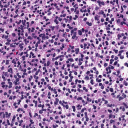

(128, 128, 3)


In [ ]:
print(train_tissue_image[1].shape)
cv2_imshow(Tissue[1])
print(Tissue[1].shape)

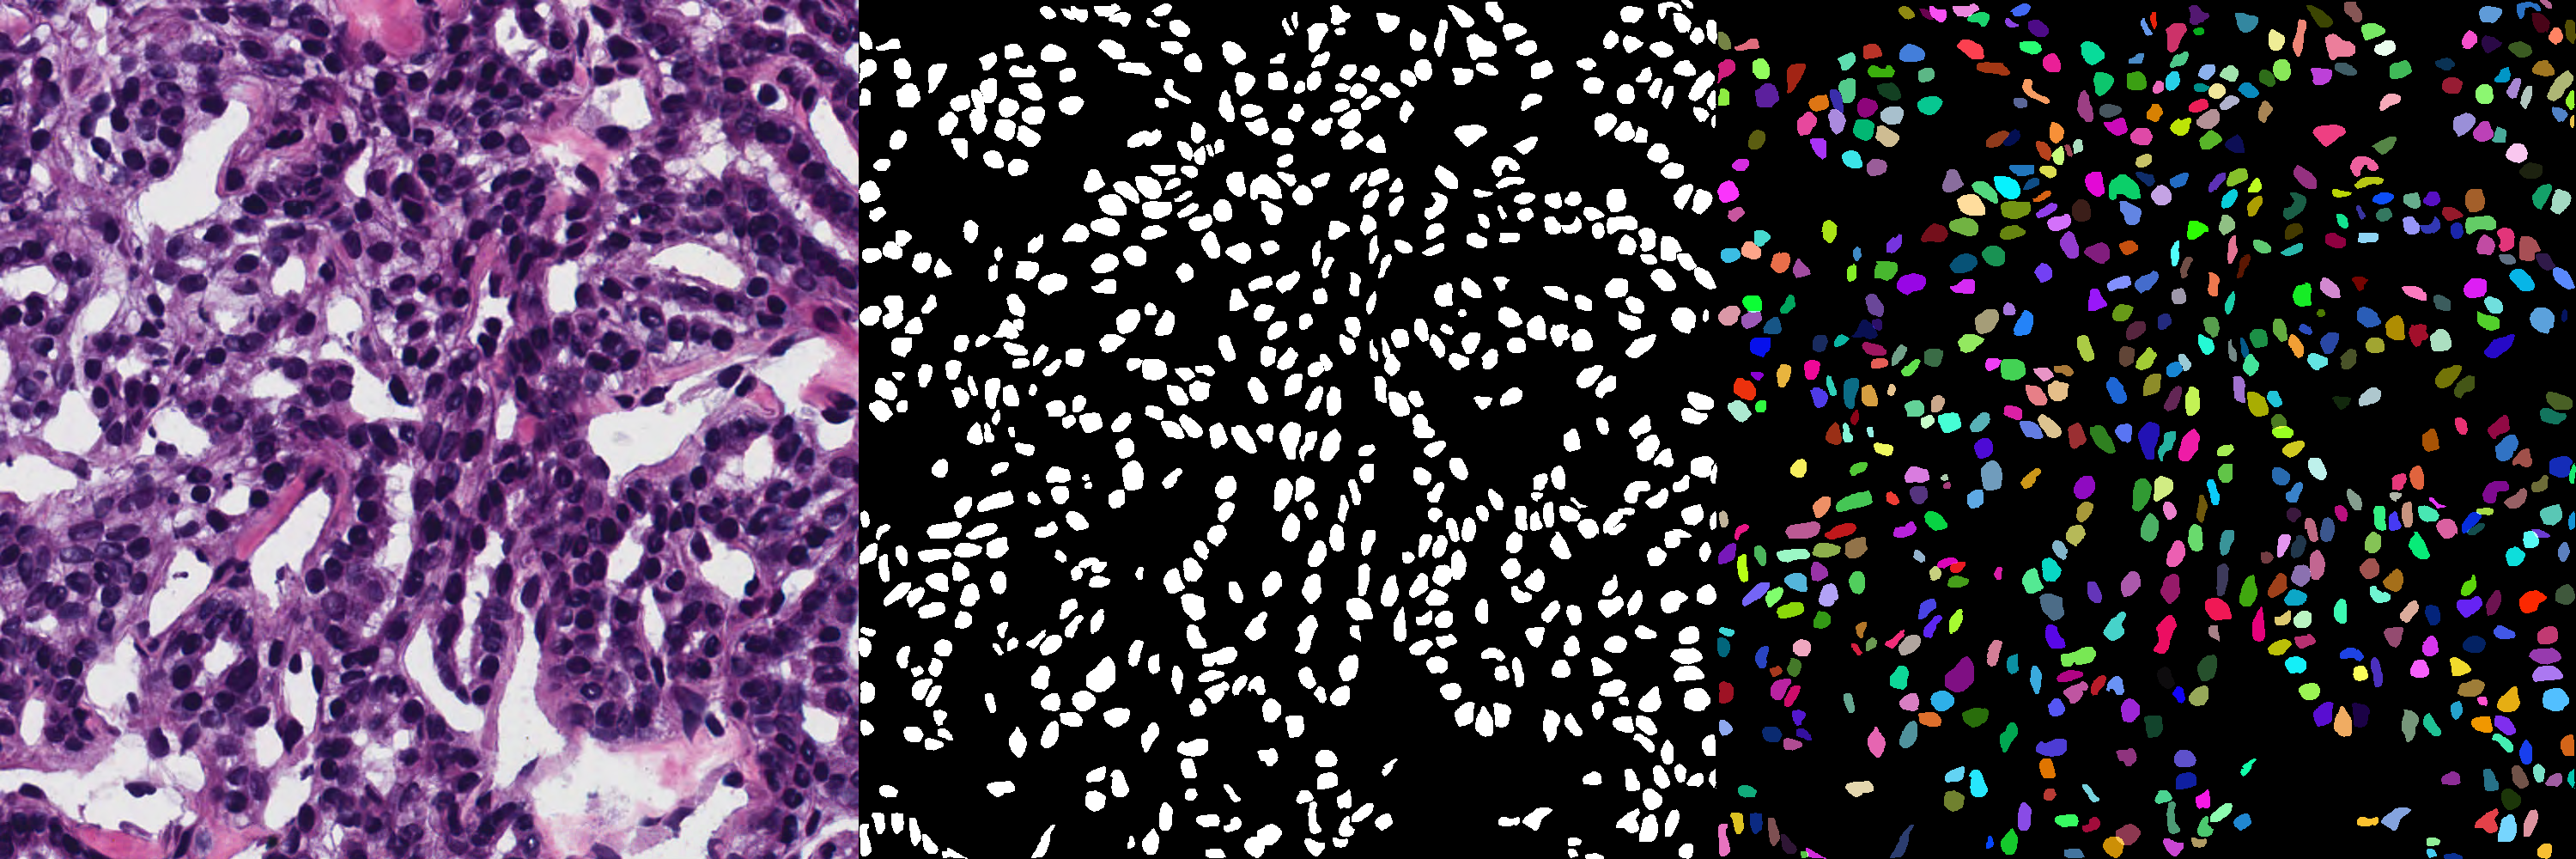

In [ ]:
test_tissue_image = load_images_from_folder("/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Test-Data/Tissue-Images")
test_binary_mask = load_images_from_folder("/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Test-Data/Binary-Mask")
test_color_mask = load_images_from_folder("/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Test-Data/Color-Mask")
horizontal_concat1 = np. concatenate((test_tissue_image[0], test_binary_mask[0],test_color_mask[0]), axis=1)
cv2_imshow(horizontal_concat1)

In [ ]:
import sys
import random
import tensorflow as tf
from tensorflow import keras

seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [ ]:
class DataGen(keras.utils.Sequence):

    def __init__(self, ids, path, batch_size=8):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size 
        self.on_epoch_end()
        
#     def __load__(self, id_name):
#         ## Path
#         image_path = os.path.join(self.path,id_name, "Tissue-Images",id_name) + ".png"
#         mask_path = os.path.join(self.path,id_name, "Binary-Mask") 
#         all_masks = os.listdir(mask_path)
        
#         ## Reading Image
#         image = cv2.imread(image_path, 1)
#         image = cv2.resize(image, (self.image_size, self.image_size),cv2.INTER_CUBIC)
        
#         mask = np.zeros((self.image_size, self.image_size, 1))
        
#         ## Reading Masks
#         for name in all_masks:
#             _mask_path = mask_path + name
#             _mask_image = cv2.imread(_mask_path, -1)
#             _mask_image = cv2.resize(_mask_image, (self.image_size, self.image_size),cv2.INTER_CUBIC) #128x128
#             _mask_image = np.expand_dims(_mask_image, axis=-1)
#             mask = np.maximum(mask, _mask_image)
            
#         ## Normalizaing 
#         image = image/255.0
#         mask = mask/255.0
#         cv2_imshow(image)
#         return image, mask
    
    def __getitem__(self,index):     
       image = np.array(Tissue[index*self.batch_size:(index+1)*self.batch_size])
       mask  = np.array(Mask[index*self.batch_size:(index+1)*self.batch_size])
        
       return image, mask
    
    def on_epoch_end(self):
       pass
    
    def __len__(self):
       return int(np.ceil(len(self.ids)/float(self.batch_size)))        

In [ ]:
# image_size = 128
# train_path = 'MonuSeg-Training-Data'  
# os.chdir('/content/gdrive/MyDrive/EE 610 /assignment 4/')

# ROOT_DIR = os.path.abspath("../../")
# sys.path.append(ROOT_DIR)


train_path ="/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Training-Data/"
epochs = 5
batch_size = 8
# image_path =  os.path.join(self.path,id_name, "Tissue-Images",id_name) 
# mask_path = os.path.join(self.path,id_name, "Binary-Mask") 
# all_masks = os.listdir(mask_path)
## Training Ids
train_ids = Tissue #"/content/gdrive/MyDrive/EE 610 /assignment 4/MoNuSeg-Training-Data/Annotations" #train_tissue_image                #      image_dict["MoNuSeg-Training-Data"]["Tissue-Images"]

## Validation Data Size
val_data_size = 8

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

In [ ]:
gen = DataGen(train_ids, train_path, batch_size=batch_size)
print(gen)
# batch_size=8
# index = 0
# x=np.array(Tissue[index*batch_size:(index+1)*batch_size])
# y=np.array(Mask[index*batch_size:(index+1)*batch_size])
x,y = gen.__getitem__(0)
print(x.shape, y.shape)

(8, 128, 128, 3) (8, 128, 128, 3)


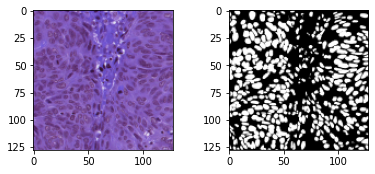

In [ ]:
nr = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
# ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")
ax.imshow(y[r])

In [ ]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [ ]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((128, 128, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 128, 128, 16  448         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_96 (Conv2D)             (None, 128, 128, 16  2320        ['conv2d_95[0][0]']              
                                )                                                           

In [ ]:
train_gen = DataGen(train_tissue_image, train_path,  batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path,  batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, 
                    epochs=epochs)  

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


2/2 [==============================] - 6s 2s/step - loss: -208.1276 - acc: 0.1285 - val_loss: -1838.8472 - val_acc: 0.0084
Epoch 2/5
2/2 [==============================] - 3s 2s/step - loss: -17287.1680 - acc: 0.0113 - val_loss: -360900.2500 - val_acc: 0.0068
Epoch 3/5
2/2 [==============================] - 3s 2s/step - loss: -1411306.1250 - acc: 0.0066 - val_loss: -18966368.0000 - val_acc: 0.0065
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: -49790904.0000 - acc: 0.0057 - val_loss: -554365184.0000 - val_acc: 0.0065
Epoch 5/5
2/2 [==============================] - 3s 2s/step - loss: -1373345792.0000 - acc: 0.0075 - val_loss: -10418324480.0000 - val_acc: 0.0065


In [ ]:
## Save the Weights
model.save_weights("UNetW.h5")

## Dataset for prediction
x, y = valid_gen.__getitem__(1)
result = model.predict(x)
s = result.shape
print(s)
for i in range(s[0]):
    for j in range(s[1]):
        for k in range(s[2]):
            result[i, j, k] = 1 if result[i, j, k] > 0.5 else 0
print(np.sum(result))

1/1 [==============================] - 1s 567ms/step
(8, 128, 128, 1)
131072.0


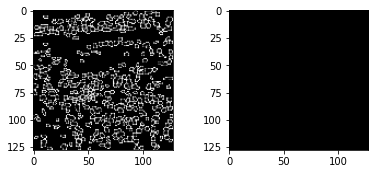

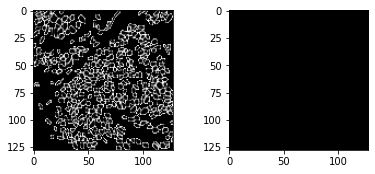

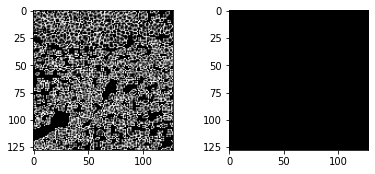

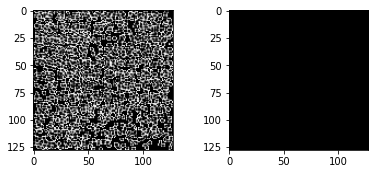

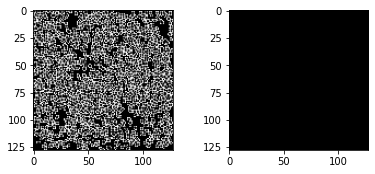

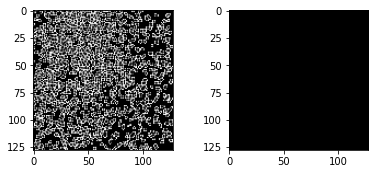

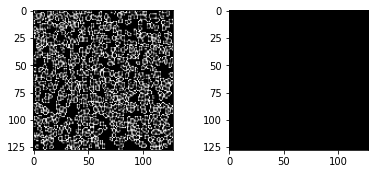

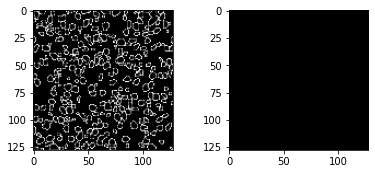

In [ ]:
for i in range(val_data_size):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.reshape(y[i]*255, (128, 128,3)), cmap="gray")
    # ax.imshow(y[1])

    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.reshape(result[i]*255, (128, 128)), cmap="gray")
    # ax.imshow(result[i])